<center><h1><em>What is the probability of a sum?</em></h1></center>
<center><h2>Daniel J. Drennan</h2></center>
<center><h3>05 January 2020</h3></center>

| Package | Version |
| --- | --- |
| Numpy | 1.16.5 |
| Scipy | 1.3.1 |
| Matplotlib | 3.1.1 |

In [1]:
import numpy as np
import scipy.stats
import scipy as sp
import matplotlib.pyplot as plt

# 1. Problem Statement

**If you roll a single die 20 times, what is the probability that the final number will be higher than 100?**

Formally, let $\{ X_i \}_{i=1}^{20}$ be a sequence of i.i.d random variables, each following $\text{Cat}(6)$ with equal probabilities for each outcome. Define $S = \sum_{i=1}^{20} X_i$. What is $\Pr(S > 100)$?

# 2. Solutions

## 2.1 Normal Approximation

For each roll of the dice, the expectation and variance are $\mathbb{E}[X_i] = 3.5$ and $\text{Var}[X_i] = 105/36$. Using independence, the sum of $n$ identically distributed random variables is $\mathbb{E}[S] = n\mathbb{E}[X_i] = 3.5n$ and $\text{Var}[S] = n\text{Var}[X_i] = 105n/36$. For $n = 20$, these amount to a mean of $70$ and variance of $525/9$. Moreover, the Central Limit Theorem tells us we can approximate the distribution of $S$ using a normal distribution.

<br>

***Theorem 1*** (Central Limit Theorem). Let $X_1, X_2, \dots, X_n$ be an independent and identically distributed random sample of size $n$ with expected value $\mathbb{E}[X_i] = \mu$ and $\text{Var}[X_i] = \sigma^2$ for all $i = 1, 2, \dots, n$. Then
$$
    S_n := \frac{X_1 + X_2 + \dotsm + X_n}{n}
    \tag{1}
$$
converges to a normal distribution with mean $\mu$ and variance $\sigma^2$ as $n \to \infty$.
<br><br>

Notice how similar the central limit theorem is to the formally written question above. The two are nearly identical, and clearly this problem is a great candidate for using the normal approximation!

To continue we will simulate a small number of dice rolls, draw a histogram of the simulated events, and then coplot the histogram with the corresponding normal approximation. Recall when scanning that we computed the expected (mean) value as $70$ with variance $58.3333$, and we can verify these estimates in the simulated data below.

In [2]:
# set seed for reproducibility
np.random.seed(10520)
# randomly roll a six-sided die 20 times
# replicate the experiment 100 000 times
D = np.random.randint(1,7, size=(100000, 20))

In [3]:
# Sum the dice rolls in each experiment row-wise
# to obtain 100 000 simulations of the event we want to learn about
data = D.sum(axis=1)
print("Estimated mean from 100 000 simulations:\t {:.5f}".format(data.mean()))
print("Estimated variance from 100 000 simulations:\t {:.5f}".format(data.var()))

Estimated mean from 100 000 simulations:	 69.97457
Estimated variance from 100 000 simulations:	 58.59686


In [4]:
# construct a normal approximation with support over the same domain as
# the sum distribution
n = sp.stats.norm(loc=data.mean(), scale=data.std()).pdf

# construct the domain of the normal pdf for plotting
s = np.linspace(20, 120, 500)

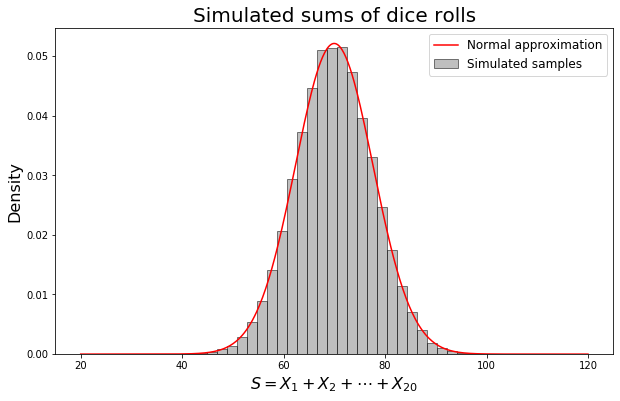

In [5]:
# make figure
plt.figure(figsize=(10,6))

# plot samples an approximating curve
plt.hist(data, bins=32, density=True, color='gray', edgecolor='black', alpha=0.5, label='Simulated samples')
plt.plot(s, n(s), 'r', label='Normal approximation')

# format the graph
plt.title("Simulated sums of dice rolls", fontsize=20)
plt.ylabel("Density", fontsize=16)
plt.xlabel("$S = X_1+ X_2+ \cdots+ X_{20}$", fontsize=16)
plt.legend(fontsize=12)

plt.show()

Comparing the simulated data above with the normal approximation due to the Central Limit Theorem, it is clear that the approximation is quite good! Thus, we can approximate the distribution of $S = X_1 + X_2 + \dotsm + X_{20}$ by
$$
    p(S) \approx \frac{1}{\sqrt{2100/36 \times 2\pi}}
    \exp\left\{ -\frac{1}{2} \frac{(s - 70)^2}{2100/36}\right\} = \mathcal{N}(70, 2100/36). \tag{2}
$$
The the probability we are interested in is given by
$$
    \Pr(S > 101) =
    \int_{101}^{120} \frac{1}{\sqrt{2100/36 \times 2\pi}}
    \exp\left\{ -\frac{1}{2} \frac{(s - 70)^2}{2100/36}\right\} ds,  \tag{3}
$$
which we can easily compute numerically using the normal distribution in `scipy.stats`:

In [6]:
# define the of our normal approximation
ncdf = sp.stats.norm(loc=70, scale = np.sqrt(2100/36)).cdf

# compute the probability given in Equation (3)
normal_approx_probability = ncdf(120)-ncdf(101)

print("Normal approximation:\t{:.6f}".format(normal_approx_probability))

normal_approx_probability * 6**20

Normal approximation:	0.000025


90150512468.44002

Using the normal approximation above, we'd expect the sum to occur about once in every $40,556$ times we throw the dice. As a frequency in $6^{20} = 3,656,158,440,062,976$, we'd expect to see a sum greater than 100 about $90,150,512,468$ times. We will revisit this approximation shortly to see how good it actually is.

## 2.2 Exact Probability Distribution

The normal approximation above would suffice for most people, but it is certainly inexact. First, it uses a continuous distribution to approximate a discrete distribution, and second it has discrepancies in the tails that we must account for. In most cases, we'd prefer to work with the exact distribution if it is even remotely attainable.

Some properties of the random variable $S$ we have been discussing are given below:

* After summing $n$ rolls, there are $5n + 1$ possible outcomes in the support of $S$.
* The minimum value of $S$ is equal to $n$ and the maximum value is equal to $6n$.
* The total number of outcomes possible for $S$ are $6^{n}$.
* The expected (mean) value after $n$ rolls is $\mathbb{E}[S] = 3.5n$ and the variance is $\text{Var}[S] = 105n\, /\, 36$.

For example, if we have summed $S = X_1 + X_2 + X_3$, the minimum possible value for the sum is $3$ and the maximum possible value is $18$. In total, there are $6^{3} = 216$ possible events, which means the space of all possible events and their frequencies is 216 tuples of the form $s = (x_1, x_2, x_3)$. Also the expected value can be verified to be $3(3.5) = 11.5$ and the variance is $3(105)/36 = 8.75$.

The properties noted above are nice to know for validation, but they do not bring us closer to finding the exact distribution of the random variable $S = \sum_{i=1}^{n} X_i$. We need to find a method for combining the sums using some closed form equation to make this problem tenable. It turns out there is a nice theorem which tells us how to combine sums of random variables, and this provides an algorithmic procedure for generating the desired probability distribution inductively.


### 2.2.1 Distributional transformations

We begin with a useful theorem.

<br>

***Theorem 2*** (Sums of random variables). Suppose $X$ and $Y$ are i.i.d discrete random variables with mass functions $p_{X}(X=x)$ and $p_{Y}(Y=y)$. Let $S = X + Y$. Then the mass function for $S$ follows as

$$p_S(s) = \sum_{\text{all}\ x} p_{X}(x) p_{Y}(s-x). \tag{4}$$

A similar result holds for continuous random variables. (Note also the computation in Equation 4 is simply a convolution over a discrete set of outcomes.)
<br><br>

Theorem 2 is useful for combining two random variables once, but for our purpose we need to apply the Theorem 20 times. This type of inductive computation is exactly what a computer is good at doing, lending to the idea that we must implement the theorem as a short program or script.

### 2.2.2 Algorithmically computing Theorem 2

Our program should take as input the number of outcomes, or support, of a random variable $S$ along with the probabilities associated with each outcome in the support. Further, it must do two things:

1. return the support of the summed random variable, and

2. return the probabilities (or frequencies) of each event.

We can simplify the functions by fixing one of the distributions as a single dice roll and then supply as input the support and probabilities of an auxiliary function, $p_Y(\cdot)$. I've chosen to implement the algorithm below by returning integer values instead of probabilities because I can minimize the roundoff error from using floating point numbers in this way.

In [7]:
def px(k):
    """
    Helper function. Returns the frequency of a single roll of one die.
    """
    if k in {1, 2, 3, 4, 5, 6}:
        y = 1
    else:
        y = 0
    return y


def py(k, support, freqs):
    """
    Helper function. Returns the frequency of a summed random variable.
    For example, if we've computed up to S = X1 + X2 + X3, this function can
    be used to compute the frequencies for each possible outcome in the distribution S.
    """
    if k in support: # test for valid input, k
        i = support.index(k) # get index of k
        r = freqs[i] # lookup the frequency associated with k
    else:
        r = 0 # if k is not in support, return 0
    return r


def ps(Y, pY):
    """Main algorithm. Return the distribution of a sum of random variables."""
    # standard support for input in px(k)
    X = [1, 2, 3, 4, 5, 6]
    
    # storage for output values
    pS = []
    
    # build support of the summed variable S = X + Y
    m = min(X) + min(Y) # minimum possible value
    M = max(X) + max(Y) # maximum possible value
    nS = [j for j in range(m, M+1)]
    
    # iterate over the support of Y
    for s in nS:
        S = 0
        for x in X:
            S += px(x) * py(s-x, Y, pY)
        pS.append(S)
    return nS, pS

Using the algorithm defined above, we can now proceed to calculate the exact distribution we wish to learn! We will do this by induction from the base case of 1 roll of the dice up to the combination of 20 rolls. Then we extract the last set of values calculated (the 20th roll) and work with it directly to plot the exact distribution at the end.

In [8]:
support = {1: [1,2,3,4,5,6]}
freqs = {1: [1]*6}

for i in range(1, 20):
    support[i+1], freqs[i+1] = ps(support[i], freqs[i])

In [9]:
# get the last support: the possible values of the sum
s20 = np.array(support[20])
# get the frequencies for each value
f20 = np.array(freqs[20])
# convert frequencies into probabilities
p20 = f20 / f20.sum()

# reproduce the normal approximation used in section 2.1
# with the theoretical mean and variance
n = sp.stats.norm(loc=20*3.5, scale=np.sqrt(20*105/36)).pdf
x = np.linspace(20, 120, 200)

The last block of code gave us the support, frequencies, and probabilities of the entire mass function for $S$, that is, we just derived $p(S)$! Next we plot a comparison of the exact distribution against the normal approximation we found earlier.

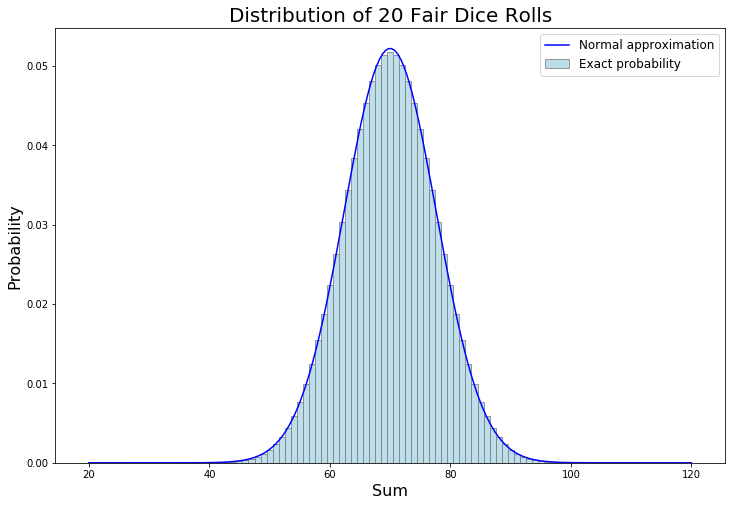

In [10]:
plt.figure(figsize=(12,8))
plt.bar(s20, p20, width=1., edgecolor='gray', color='lightblue', alpha=0.80, label="Exact probability")
plt.plot(x, n(x), color='b', label="Normal approximation")

plt.title("Distribution of 20 Fair Dice Rolls", fontsize=20)
plt.xlabel("Sum", fontsize=16)
plt.ylabel("Probability", fontsize=16)
plt.legend(fontsize=12)
plt.show()

Visually we can again confirm the exact distribution appears to agree very well with the normal approximation. But this is not very surprising. Recall when we used the normal approximation we computed the probability $\Pr(S > 100) \approx 0.000043$. Now we can compare this value with the exact probability.

In [11]:
# sum probabilities from 101 to 120
exact_prob = p20[-20].sum()

print("Exact probability:\t {:.8f}".format(exact_prob))
print("Normal Approximation:\t {:.8f}".format(normal_approx_probability))

Exact probability:	 0.00000780
Normal Approximation:	 0.00002466


Now we can clearly see the normal approximation was not as good as we may have thought. But rather than comparing decimals, let's examine the exact ratio of the approximation with the exact probability. The comparison is
$$
    R = \frac{\Pr(S > 100)_{\text{Normal}}}{\Pr(S > 100)_{\text{Exact}}}
$$

In [12]:
print("Ratio of probabilities:\t {:.5f}".format(normal_approx_probability / exact_prob))

Ratio of probabilities:	 3.16065


Thus we can see the estimated probability using the normal approximation is more than 3 times as likely as the exact distribution. This is a pretty gross overestimate! We can take this one step further by looking at the log-distributions between the approximation and the exact distribution to see why the discrepancy is so large. This is done below.

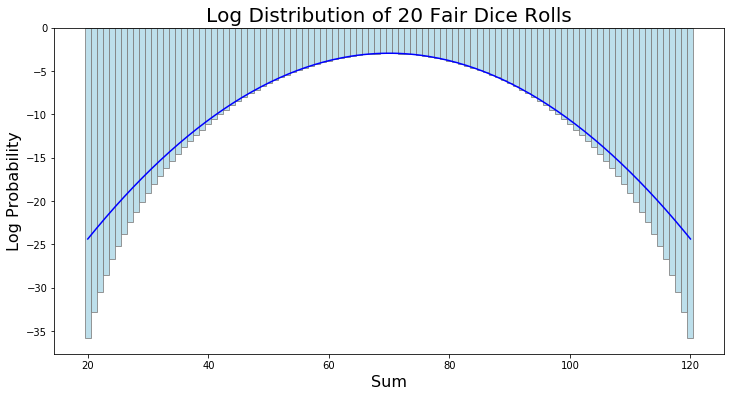

In [13]:
plt.figure(figsize=(12,6))
plt.bar(s20, np.log(f20/f20.sum()), width=1., edgecolor='gray', color='lightblue', alpha=0.80)
plt.plot(x, np.log(n(x)), color='b')

plt.title("Log Distribution of 20 Fair Dice Rolls", fontsize=20)
plt.xlabel("Sum", fontsize=16)
plt.ylabel("Log Probability", fontsize=16)
plt.show()

# 3. Conclusion


In the above plot we've taken logarithms of the exact distribution, $p(S)$, and its approximation, $\tilde{p}(S) = \mathcal{N}(70, 2100/36)$. Notice that the curve approximation is quite good for values of the sum between about 50 and 90, which is $70 \pm 20$—anything within 2.5 standard deviations of the mean. But beyond the 2.5 standard deviation mark, the tails are drastically different between the two distribution, and the approximation rapidly worsens by overestimating the frequency of rare events.

Although this looked simple to implement, it does require some knowledge of probability and decent coding skills to implement successfully. I haven't touched on it here, but an alternative to both methods presented is to do a Monte Carlo simulation of the experiment (millions of times) and to estimate the probability that way. The methods presented here were computationally expensive, but they were not very expensive for memory. Monte Carlo methods to obtain the result would be more expensive in memory and they would take longer to conduct. Thus, I've omitted them.

The major points I wanted to emphasize here were discussing the central limit theorem and the normal approximation, and then finding the exact probability requested in the original question. Then I wanted to show why the normal approximation may fail to provide an accurate estimate, and to provide an insight into why the approximation fails for this particular problem.